# LADY N GENTLEMEN, BOYZ N GIRL, today we will be doing some SWAGGY data viz! 
Bing Bong 

In [235]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import altair as alt

In [236]:
country_jan = pd.read_csv('QueriesByCountry_2020-01-01_2020-01-31.tsv', sep='\t')
country_feb = pd.read_csv('QueriesByCountry_2020-02-01_2020-02-29.tsv', sep='\t')
country_mar = pd.read_csv('QueriesByCountry_2020-03-01_2020-03-31.tsv', sep='\t')
country_apr = pd.read_csv('QueriesByCountry_2020-04-01_2020-04-30.tsv', sep='\t')
state_jan =  pd.read_csv('QueriesByState_2020-01-01_2020-01-31.tsv', sep='\t')
state_feb = pd.read_csv('QueriesByState_2020-02-01_2020-02-29.tsv', sep='\t')
state_mar = pd.read_csv('QueriesByState_2020-03-01_2020-03-31.tsv', sep='\t')
state_apr = pd.read_csv('QueriesByState_2020-04-01_2020-04-30.tsv', sep='\t')

Date : string, Date on which the query was issued.

Query : string, The actual search query issued by user(s).

IsImplicitIntent : bool, True if query did not mention covid or coronavirus or sarsncov2 (e.g, “Shelter in place”). False otherwise.

Country : string, Country from where the query was issued.

PopularityScore : int, Value between 1 and 100 inclusive. 1 indicates least popular query on the day/Country with Coronavirus intent, and 100 indicates the most popular query for the same Country on the same day.

In [237]:
country_jan.Date = country_jan.Date.astype('datetime64[ns]')
country_feb.Date = country_feb.Date.astype('datetime64[ns]')
country_mar.Date = country_mar.Date.astype('datetime64[ns]')
country_apr.Date = country_apr.Date.astype('datetime64[ns]')
state_jan.Date = state_jan.Date.astype('datetime64[ns]')
state_jan.Date = state_jan.Date.astype('datetime64[ns]')
state_jan.Date = state_jan.Date.astype('datetime64[ns]')
state_jan.Date = state_jan.Date.astype('datetime64[ns]')

In [238]:
country_apr.head()

Date                                              Query  \
0 2020-04-01                         is influenza a coronavirus   
1 2020-04-01              pennsylvania coronavirus stay at home   
2 2020-04-01               number of coronavirus tests by state   
3 2020-04-01  https://www.gov.uk/coronavirus-extremely-vulne...   
4 2020-04-01              cdc coronavirus update new york state   

   IsImplicitIntent         Country  PopularityScore  
0             False   United States                1  
1             False   United States                1  
2             False   United States                1  
3             False  United Kingdom                1  
4             False   United States                1

In [239]:
state_jan.head()

Date            Query  IsImplicitIntent                         State  \
0 2020-01-01         p2 masks              True               New South Wales   
1 2020-01-01      coronavirus             False                  Pennsylvania   
2 2020-01-01      coronavirus             False                      Michigan   
3 2020-01-01  auswärtiges amt              True        North Rhine-Westphalia   
4 2020-01-01         p2 masks              True  Australian Capital Territory   

         Country  PopularityScore  
0      Australia                1  
1  United States                1  
2  United States                1  
3        Germany                1  
4      Australia                1

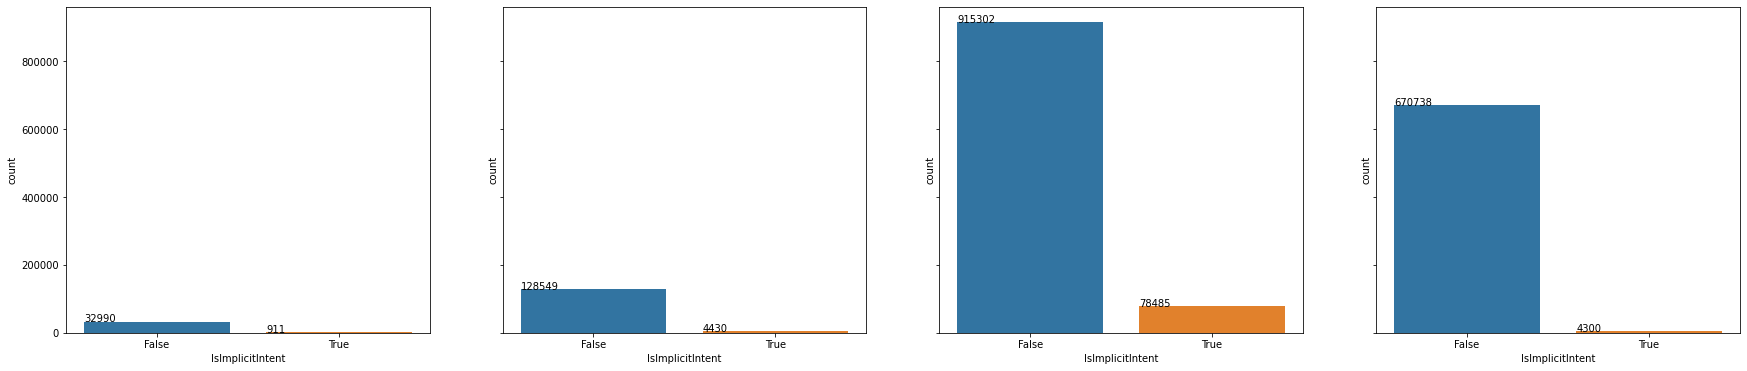

In [240]:
# Count the number of True and False in the dataset
f, axes = plt.subplots(1, 4, figsize = (30, 6), sharey = True)
ax = sb.countplot(x = 'IsImplicitIntent', data = country_jan, ax = axes[0])
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
ax = sb.countplot(x = 'IsImplicitIntent', data = country_feb, ax = axes[1])
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
ax = sb.countplot(x = 'IsImplicitIntent', data = country_mar, ax = axes[2])
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
ax = sb.countplot(x = 'IsImplicitIntent', data = country_apr, ax = axes[3])
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))



## Comparing % of True and False values 

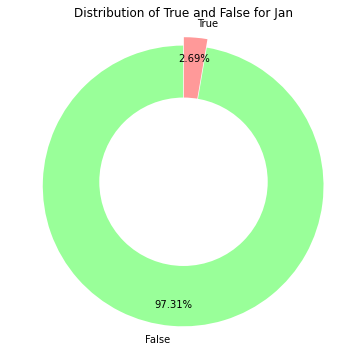

In [241]:
from pylab import rcParams 

fig1, ax1 = plt.subplots()

colors = ['#99ff99', '#ff9999']
country_jan["IsImplicitIntent"].value_counts().plot(kind = 'pie', colors=colors, startangle=90, pctdistance=0.85, 
                                    explode = [0.03, 0.03], figsize = (5, 5), autopct = '%1.2f%%')

plt.title("Distribution of True and False for Jan", fontsize=12)
plt.ylabel(" ")


centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

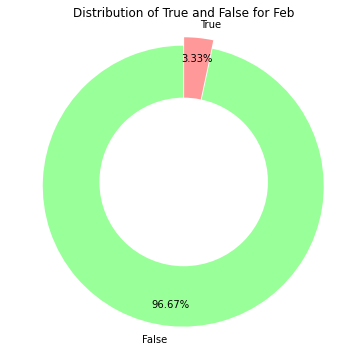

In [242]:
fig1, ax1 = plt.subplots()

colors = ['#99ff99', '#ff9999']
country_feb["IsImplicitIntent"].value_counts().plot(kind = 'pie', colors=colors, startangle=90, pctdistance=0.85, 
                                    explode = [0.03, 0.03], figsize = (5, 5), autopct = '%1.2f%%')

plt.title("Distribution of True and False for Feb", fontsize=12)
plt.ylabel(" ")


centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

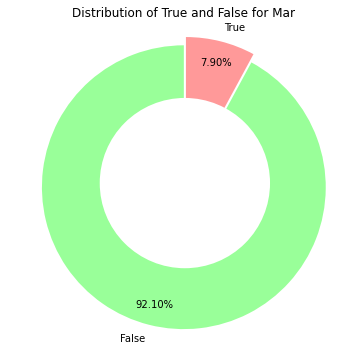

In [243]:
fig1, ax1 = plt.subplots()

colors = ['#99ff99', '#ff9999']
country_mar["IsImplicitIntent"].value_counts().plot(kind = 'pie', colors=colors, startangle=90, pctdistance=0.85, 
                                    explode = [0.03, 0.03], figsize = (5, 5), autopct = '%1.2f%%')

plt.title("Distribution of True and False for Mar", fontsize=12)
plt.ylabel(" ")

centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

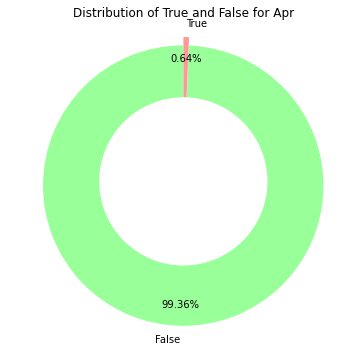

In [244]:
fig1, ax1 = plt.subplots()

colors = ['#99ff99', '#ff9999']
country_apr["IsImplicitIntent"].value_counts().plot(kind = 'pie', colors=colors, startangle=90, pctdistance=0.85, 
                                    explode = [0.03, 0.03], figsize = (5, 5), autopct = '%1.2f%%')

plt.title("Distribution of True and False for Apr", fontsize=12)
plt.ylabel(" ")


centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Splitting Datasets further based on True and False

In [245]:
country_jan_true = country_jan[country_jan['IsImplicitIntent'] ==  True]
country_jan_false = country_jan[country_jan['IsImplicitIntent'] ==  False]
country_feb_true = country_feb[country_feb['IsImplicitIntent'] ==  True]
country_feb_false = country_feb[country_feb['IsImplicitIntent'] ==  False]
country_mar_true = country_mar[country_mar['IsImplicitIntent'] ==  True]
country_mar_false = country_mar[country_mar['IsImplicitIntent'] ==  False]
country_apr_true = country_apr[country_apr['IsImplicitIntent'] ==  True]
country_apr_false = country_apr[country_apr['IsImplicitIntent'] ==  False]

In [246]:
country_jan_true.head()

Date                 Query  IsImplicitIntent         Country  \
0 2020-01-01               webasto              True         Germany   
2 2020-01-01              p2 masks              True       Australia   
3 2020-01-01           china virus              True   United States   
4 2020-01-01    p2 masks australia              True       Australia   
5 2020-01-01  arrowe park hospital              True  United Kingdom   

   PopularityScore  
0                1  
2              100  
3               15  
4                1  
5                1

In [247]:
country_jan_false.head()

Date             Query  IsImplicitIntent        Country  \
1  2020-01-01       coronavirus             False  United States   
7  2020-01-01  coronavirus hku1             False  United States   
12 2020-01-01              冠状病毒             False          China   
14 2020-01-01      corona virus             False  United States   
15 2020-01-02  coronavirus hku1             False  United States   

    PopularityScore  
1               100  
7                16  
12                1  
14               13  
15               12

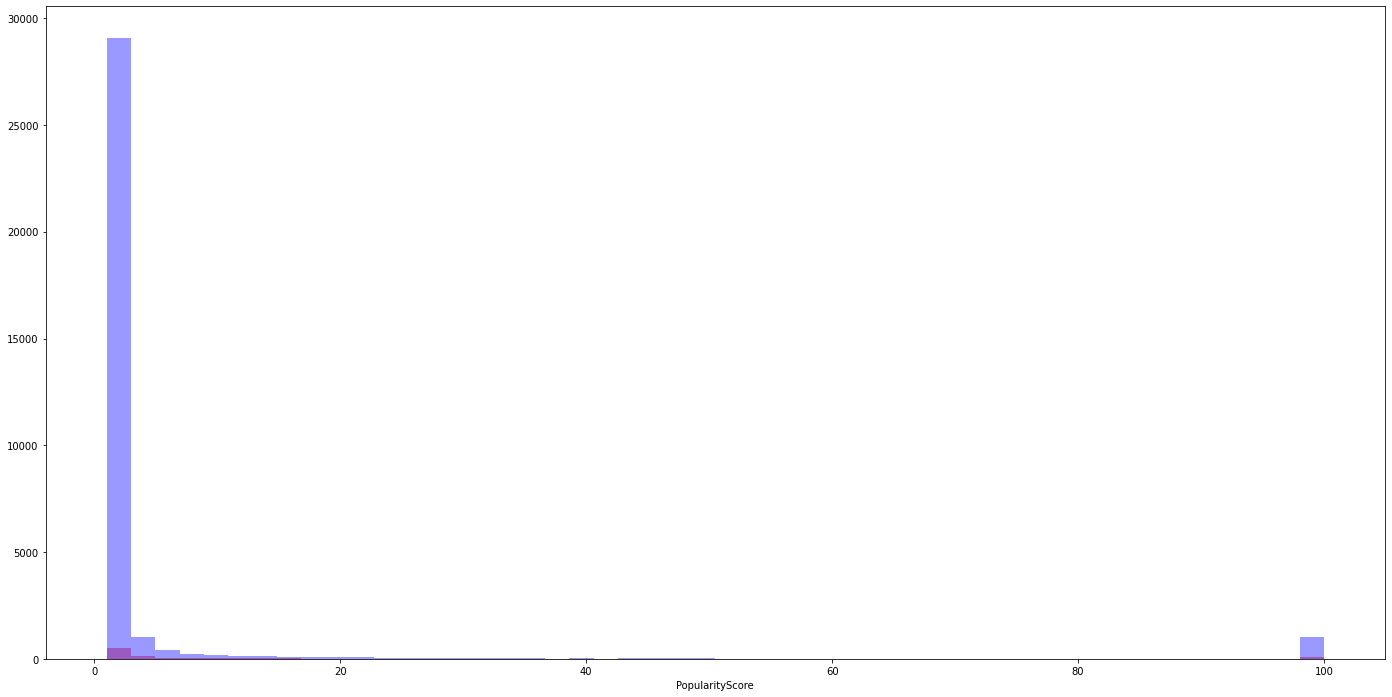

In [248]:
# Plotting a histogram for PopularityScore based on each month
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(country_jan_true["PopularityScore"], kde = False, color = "red")
sb.distplot(country_jan_false["PopularityScore"], kde = False, color = "blue")

That was not good because the number of True vs False is too skewed towards False. Gonna try with Trues for each month vs False for each month.

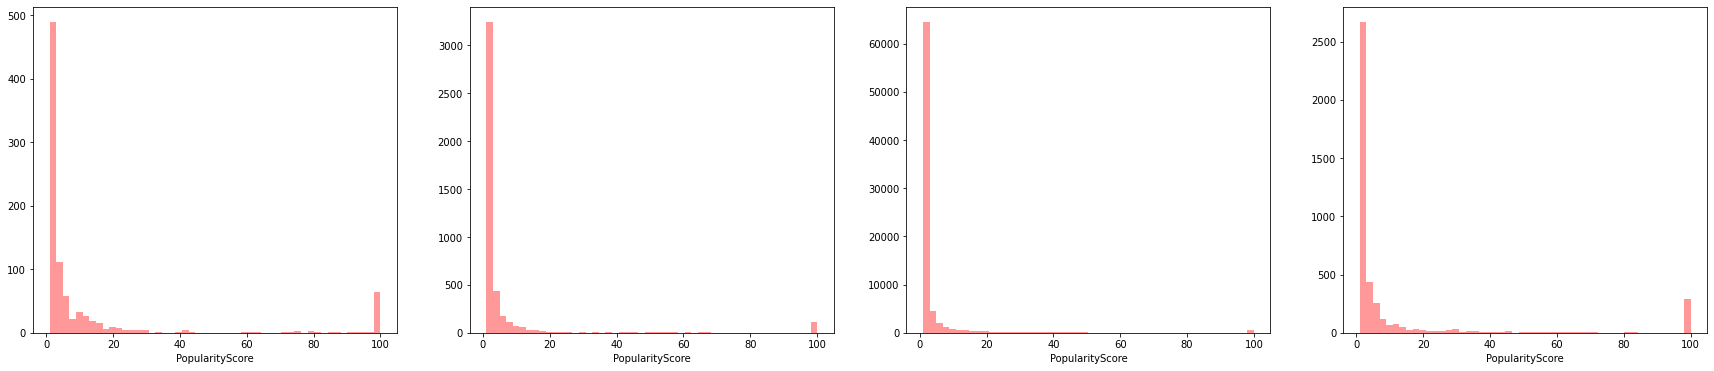

In [249]:
# Plotting histograms for True values, note that y-axis is NOT consistent
f, axes = plt.subplots(1, 4, figsize = (30, 6), sharey = False)
ax = sb.distplot(country_jan_true["PopularityScore"], kde = False, color = "red", ax = axes[0])
ax = sb.distplot(country_feb_true["PopularityScore"], kde = False, color = "red", ax = axes[1])
ax = sb.distplot(country_mar_true["PopularityScore"], kde = False, color = "red", ax = axes[2])
ax = sb.distplot(country_apr_true["PopularityScore"], kde = False, color = "red", ax = axes[3])


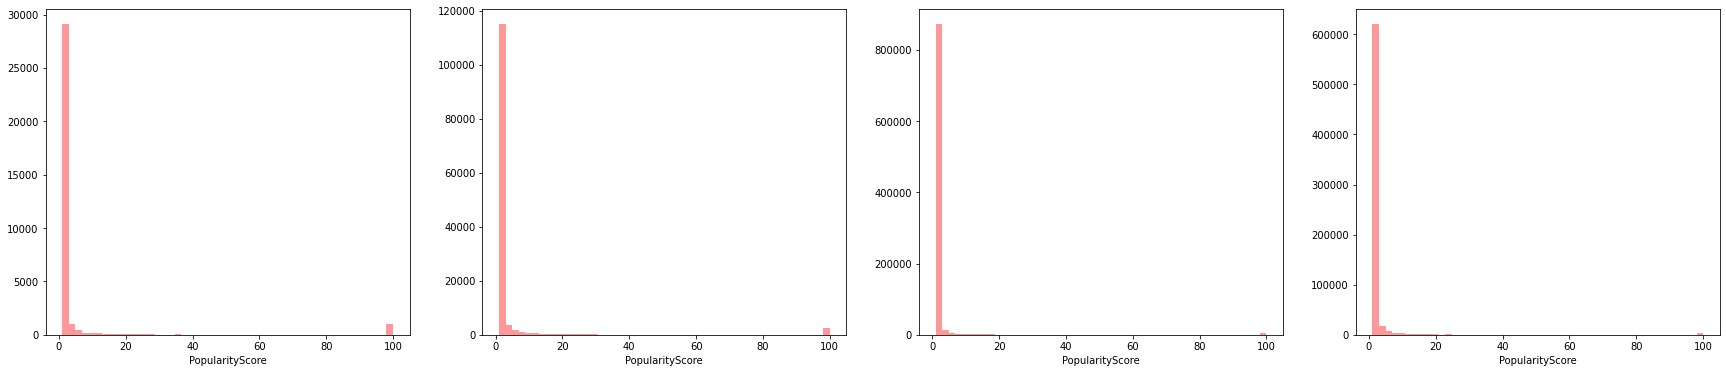

In [250]:
# Plotting histograms for False values, note that y-axis is NOT consistent
f, axes = plt.subplots(1, 4, figsize = (30, 6), sharey = False)
ax = sb.distplot(country_jan_false["PopularityScore"], kde = False, color = "red", ax = axes[0])
ax = sb.distplot(country_feb_false["PopularityScore"], kde = False, color = "red", ax = axes[1])
ax = sb.distplot(country_mar_false["PopularityScore"], kde = False, color = "red", ax = axes[2])
ax = sb.distplot(country_apr_false["PopularityScore"], kde = False, color = "red", ax = axes[3])


Because this yielded subpar results, finding the average PopularityScore for True vs False would (hopefully) be better.

In [251]:
# Making new dataframe with only True dataframes
data = [["jan", country_jan_true["PopularityScore"].sum(), country_jan_true["Country"].count()], 
        ["feb", country_feb_true["PopularityScore"].sum(), country_feb_true["Country"].count()], 
        ["mar", country_mar_true["PopularityScore"].sum(), country_mar_true["Country"].count()], 
        ["apr", country_apr_true["PopularityScore"].sum(), country_apr_true["Country"].count()]]
countries_true = pd.DataFrame(data, columns = ['Month', 'TotalPopularityScore', 'NoOfScore']) 
countries_true["AverageScore"] = countries_true["TotalPopularityScore"]/countries_true["NoOfScore"]

countries_true

Month  TotalPopularityScore  NoOfScore  AverageScore
0   jan                 12097        911     13.278814
1   feb                 27575       4430      6.224605
2   mar                326268      78485      4.157075
3   apr                 50908       4300     11.839070

In [252]:
# Making new dataframe with only False dataframes
data = [["jan", country_jan_false["PopularityScore"].sum(), country_jan_false["Country"].count()], 
        ["feb", country_feb_false["PopularityScore"].sum(), country_feb_false["Country"].count()], 
        ["mar", country_mar_false["PopularityScore"].sum(), country_mar_false["Country"].count()], 
        ["apr", country_apr_false["PopularityScore"].sum(), country_apr_false["Country"].count()]]
countries_false = pd.DataFrame(data, columns = ['Month', 'TotalPopularityScore', 'NoOfScore']) 
countries_false["AverageScore"] = countries_false["TotalPopularityScore"]/countries_false["NoOfScore"]
countries_false

Month  TotalPopularityScore  NoOfScore  AverageScore
0   jan                171009      32990      5.183662
1   feb                531831     128549      4.137185
2   mar               1863063     915302      2.035463
3   apr               1608790     670738      2.398537

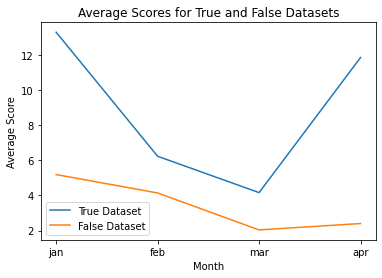

In [253]:
x1 = countries_true["Month"]
y1 = countries_true["AverageScore"].astype("float")
plt.plot(x1, y1, label = "True Dataset")
x2 = countries_false["Month"]
y2 = countries_false["AverageScore"].astype("float")
plt.plot(x2, y2, label = "False Dataset")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Average Score')
# Set a title of the current axes.
plt.title('Average Popularity Scores for True and False Datasets')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Note that this may be due to the small number of searches for "True".

## WordCloud Time~~ 
(note: based on no of times a country appears, NOT popularity score!)

In [254]:
country_jan_valuecounts = country_jan['Country'].value_counts().rename_axis('Country').reset_index(name='counts')
country_jan_valuecounts

Country  counts
0               United States   14330
1              United Kingdom    3330
2                     Germany    2670
3                      Canada    2172
4                      France    1396
..                        ...     ...
181  Virgin Islands (British)       1
182                    Gambia       1
183                     Tonga       1
184  Northern Mariana Islands       1
185                Micronesia       1

[186 rows x 2 columns]

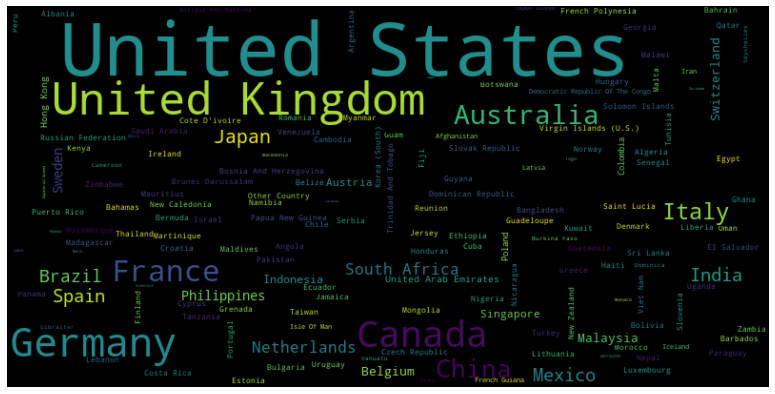

In [275]:
d = {}
for a, x in country_jan_valuecounts.values:
    d[a] = x

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [256]:
country_feb_valuecounts = country_feb['Country'].value_counts().rename_axis('Country').reset_index(name='counts')
country_feb_valuecounts

Country  counts
0                       United States   53233
1                      United Kingdom   14795
2                             Germany   12237
3                               Italy    9972
4                              France    7641
..                                ...     ...
184  Saint Vincent And The Grenadines       1
185                          Anguilla       1
186                        Kazakhstan       1
187                           Moldova       1
188                              Chad       1

[189 rows x 2 columns]

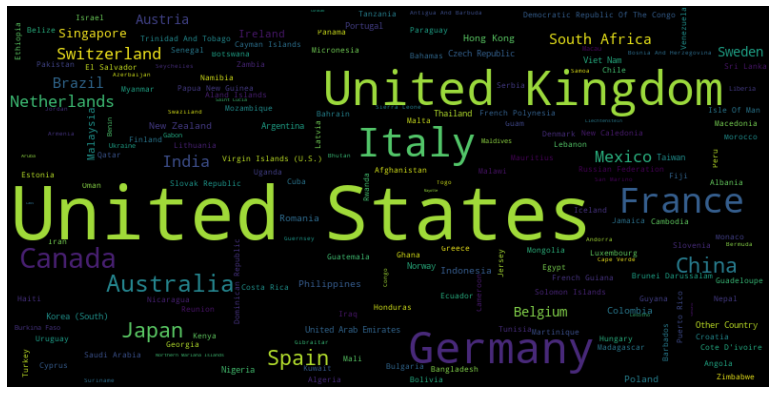

In [257]:
d = {}
for a, x in country_feb_valuecounts.values:
    d[a] = x
    
wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [258]:
country_mar_valuecounts = country_mar['Country'].value_counts().rename_axis('Country').reset_index(name='counts')
country_mar_valuecounts

Country  counts
0     United States  481819
1    United Kingdom  116569
2            France   78914
3           Germany   70046
4             Italy   51745
..              ...     ...
206      Mauritania       2
207         Belarus       2
208         Comoros       1
209      Tajikistan       1
210   Aland Islands       1

[211 rows x 2 columns]

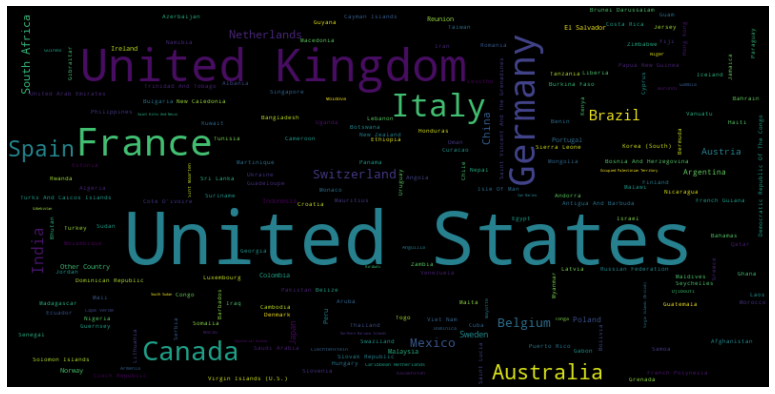

In [259]:
d = {}
for a, x in country_mar_valuecounts.values:
    d[a] = x

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [260]:
country_apr_valuecounts = country_apr['Country'].value_counts().rename_axis('Country').reset_index(name='counts')
country_apr_valuecounts

Country  counts
0     United States  367453
1    United Kingdom   63848
2            France   51790
3            Canada   38185
4           Germany   26956
..              ...     ...
193           Tonga       1
194         Belarus       1
195    Sint Maarten       1
196     South Sudan       1
197           Niger       1

[198 rows x 2 columns]

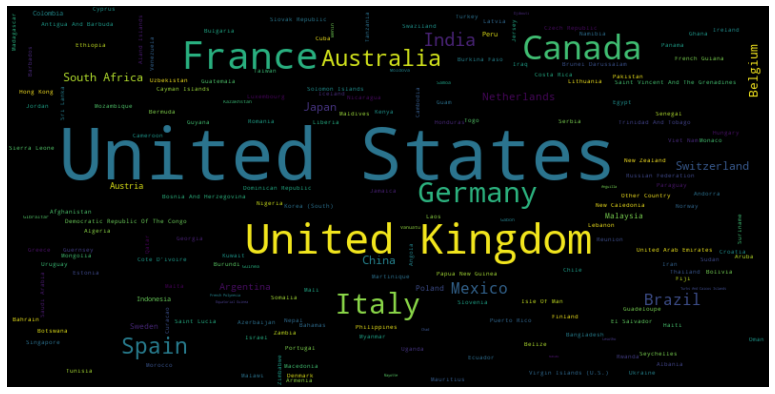

In [261]:
d = {}
for a, x in country_apr_valuecounts.values:
    d[a] = x

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

I guess its interesting to note that Italy was in the top 5 for Feb and Mar, which corresponds to when the country was facing the worst of the virus?

# Zooming into States
we're going on a trip~~

In [262]:
state_jan["State"].unique()

array(['New South Wales', 'Pennsylvania', 'Michigan',
       'North Rhine-Westphalia', 'Australian Capital Territory',
       'West Midlands', 'California', 'Merseyside', 'Missouri', 'Bavaria',
       'London', 'Ontario', 'East Sussex', 'Berlin', 'Greater Manchester',
       'Hamburg', 'Illinois', 'Tennessee', 'Rhineland-Palatinate',
       'Hertfordshire', 'New York', 'Hesse', 'Baden-Wuerttemberg',
       'West Yorkshire', 'Ohio', 'Virginia', 'Texas', 'South Yorkshire',
       'Wisconsin', 'Saxony', 'Lower Saxony', 'Essex', 'North Carolina',
       'Colorado', 'Victoria', 'Durham', 'Lancashire', 'Washington',
       'Indiana', 'Florida', 'Kingston Upon Hull', 'England', 'Kansas',
       'Schleswig-Holstein', 'Occitanie', 'Saitama', 'Niigata', 'Beijing',
       'Central And Western District', 'Tyne And Wear', 'Nagano', 'Aichi',
       'Toyama', 'Hiroshima', 'Shanghai', 'Ishikawa', 'Jiangsu',
       'Kanagawa', 'Maryland', 'Chiba', 'Tokyo', 'Gifu', 'Fujian',
       'Fukuoka', 'Okayama',

In [263]:
state_jan["Country"].unique()

array(['Australia', 'United States', 'Germany', 'United Kingdom',
       'Canada', 'France', 'Japan', 'China', 'Hong Kong', 'Taiwan',
       'Philippines', 'Mexico', 'Spain', 'Colombia', 'Malaysia', 'India',
       'Sweden', 'Netherlands', 'Italy', 'Austria', 'Brazil', 'Indonesia',
       'United Arab Emirates', 'Finland', 'Ireland', 'Belgium',
       'Singapore', 'Switzerland', 'South Africa', 'Nigeria',
       'New Zealand', 'Korea (South)', 'Thailand', 'Barbados',
       'Nicaragua', 'Argentina', 'Romania', 'Honduras', 'Turkey',
       'Papua New Guinea', 'Belize', 'Guatemala', 'Costa Rica', 'Peru',
       'Luxembourg', 'Chile', 'El Salvador', 'Norway', 'Venezuela',
       'Panama', 'Ecuador', 'Czech Republic', 'Fiji', 'Kenya', 'Nepal',
       'Puerto Rico', 'Bahamas', 'Dominican Republic', 'Jamaica',
       'Zimbabwe', 'Paraguay', 'Portugal', 'Denmark', 'Madagascar',
       'Qatar', 'Senegal', 'Trinidad And Tobago', 'Kuwait', 'Bermuda',
       'Ghana', 'Uruguay', 'Hungary', 'Zambia

In [264]:
state_jan_total = state_jan.groupby(["State"]).sum()
state_jan_total = state_jan_total.drop(columns = ["IsImplicitIntent"])

state_feb_total = state_feb.groupby(["State"]).sum()
state_feb_total = state_feb_total.drop(columns = ["IsImplicitIntent"])

state_mar_total = state_mar.groupby(["State"]).sum()
state_mar_total = state_mar_total.drop(columns = ["IsImplicitIntent"])

state_apr_total = state_apr.groupby(["State"]).sum()
state_apr_total = state_apr_total.drop(columns = ["IsImplicitIntent"])
state_jan_total

PopularityScore
State                         
Aargau                     421
Aberdeen City              529
Aberdeenshire                7
Abidjan                      9
Abruzzi                    511
...                        ...
Zlinsky Kraj               207
Zug                        107
Zulia                        7
Zurich                    1256
`Amman                       1

[938 rows x 1 columns]

## Distribution of Total Popularity Score by State

Only did this for Jan, but can be repeated for other months easily (is it worth it tho?!?!?)

In [265]:
state_jan_total = state_jan_total.merge(state_jan.drop(columns=["IsImplicitIntent"]), on="State")
state_jan_total

State  PopularityScore_x       Date                Query      Country  \
0      Aargau                421 2020-01-23          coronavirus  Switzerland   
1      Aargau                421 2020-01-24          coronavirus  Switzerland   
2      Aargau                421 2020-01-25          coronavirus  Switzerland   
3      Aargau                421 2020-01-26          coronavirus  Switzerland   
4      Aargau                421 2020-01-27  coronavirus schweiz  Switzerland   
...       ...                ...        ...                  ...          ...   
39959  Zurich               1256 2020-01-31          coronavirus  Switzerland   
39960  Zurich               1256 2020-01-31     coronavirus news  Switzerland   
39961  Zurich               1256 2020-01-31  coronavirus schweiz  Switzerland   
39962  Zurich               1256 2020-01-31      bag coronavirus  Switzerland   
39963  `Amman                  1 2020-01-29          coronavirus       Jordan   

       PopularityScore_y  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
...                  ...  
39959                100  
39960                  1  
39961                  2  
39962                  2  
39963                  1  

[39964 rows x 6 columns]

In [266]:
state_jan_total = state_jan_total.drop(columns=["Date", "Query", "PopularityScore_y"])

In [267]:
state_jan_total.drop_duplicates()

State  PopularityScore_x         Country
0             Aargau                421     Switzerland
15     Aberdeen City                529  United Kingdom
34     Aberdeenshire                  7  United Kingdom
41           Abidjan                  9   Cote D'ivoire
50           Abruzzi                511           Italy
...              ...                ...             ...
39898   Zlinsky Kraj                207  Czech Republic
39907            Zug                107     Switzerland
39915          Zulia                  7       Venezuela
39922         Zurich               1256     Switzerland
39963         `Amman                  1          Jordan

[954 rows x 3 columns]

In [268]:
source = state_jan_total

alt.Chart(source).mark_circle().encode(
    x='Country',
    y='PopularityScore_x',
    color='State',
).interactive()

brush = alt.selection_interval()
alt.Chart(source).mark_point().encode(
    x='Country',
    y='PopularityScore_x',
    color=alt.condition(brush, 'State', alt.value('lightgray'))
).add_selection(
    brush
)

alt.Chart(...)

In [269]:
# Checking if original dataframes are still the same
country_jan

Date                    Query  IsImplicitIntent         Country  \
0     2020-01-01                  webasto              True         Germany   
1     2020-01-01              coronavirus             False   United States   
2     2020-01-01                 p2 masks              True       Australia   
3     2020-01-01              china virus              True   United States   
4     2020-01-01       p2 masks australia              True       Australia   
...          ...                      ...               ...             ...   
33896 2020-01-31       coronavirus nevada             False   United States   
33897 2020-01-31  coronavirus philippines             False          Canada   
33898 2020-01-31           le coronavirus             False          France   
33899 2020-01-31       coronavirus türkei             False         Germany   
33900 2020-01-31  coronavirus precautions             False  United Kingdom   

       PopularityScore  
0                    1  
1                  100  
2                  100  
3                   15  
4                    1  
...                ...  
33896                1  
33897                1  
33898                2  
33899                1  
33900                1  

[33901 rows x 5 columns]